# Gastric Cancer Prediction using Machine Learning

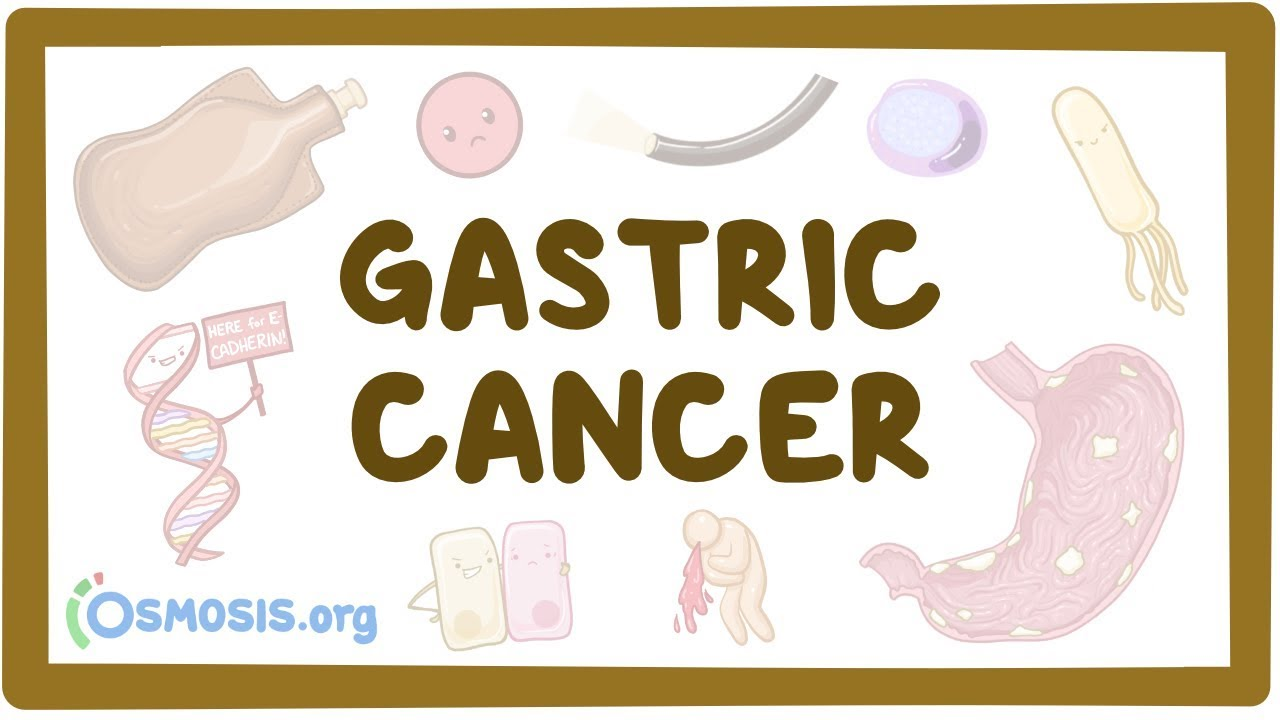

# Importing Libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [3]:
df = pd.read_csv('C:/Users/ARCHANA/Desktop/submissio7th sem/AIH/mini project/gastric_cancer.csv')

# Exploratory Data Analysis

In [4]:
df.head()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
0,1,MIMAT0002820,hsa-miR-497-5p,SEMA6D,80031.0,ENSG00000137872,1,4,1,2,1,1,1,1,8,8
1,2,MIMAT0002820,hsa-miR-497-5p,AK4,205.0,ENSG00000162433,1,2,0,1,1,1,1,1,7,7
2,3,MIMAT0002820,hsa-miR-497-5p,CCNE1,898.0,ENSG00000105173,2,4,0,2,2,1,2,2,7,7
3,4,MIMAT0002820,hsa-miR-497-5p,CD2AP,23607.0,ENSG00000198087,1,2,0,1,1,1,1,1,7,7
4,5,MIMAT0002820,hsa-miR-497-5p,CDK17,5128.0,ENSG00000059758,2,2,0,1,2,1,1,1,7,7


In [5]:
df.tail()

,Unnamed: 0,mature_mirna_acc,mature_mirna_id,target_symbol,target_entrez,target_ensembl,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
3706,3707,MIMAT0002820,hsa-miR-497-5p,ZP1,22917.0,ENSG00000149506,1,0,0,0,0,0,0,0,1,1
3707,3708,MIMAT0002820,hsa-miR-497-5p,ZP3,7784.0,ENSG00000188372,0,0,1,0,0,0,0,0,1,1
3708,3709,MIMAT0002820,hsa-miR-497-5p,ZPBP2,124626.0,ENSG00000186075,0,0,1,0,0,0,0,0,1,1
3709,3710,MIMAT0002820,hsa-miR-497-5p,ZRANB1,54764.0,ENSG00000019995,2,0,0,0,0,0,0,0,1,1
3710,3711,MIMAT0002820,hsa-miR-497-5p,ZSWIM5,57643.0,ENSG00000162415,0,0,0,0,0,0,1,0,1,1


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.shape

(3711, 15)

In [8]:
df.columns

Index(['mature_mirna_acc', 'mature_mirna_id', 'target_symbol', 'target_entrez',
       'target_ensembl', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')

### Dataset Components

1. **`mature_mirna_acc`**: Accession number of the mature microRNA.
2. **`mature_mirna_id`**: Identifier for the mature microRNA.
3. **`target_symbol`**: Symbol for the target protein (e.g., HER2).
4. **`target_entrez`**: Entrez Gene ID for the target protein.
5. **`target_ensembl`**: Ensembl ID for the target protein.
6. **`diana_microt`**: MicroRNA-target interaction prediction from DIANA.
7. **`elmmo`**: MicroRNA-target interaction prediction from ELMo.
8. **`microcosm`**: MicroRNA-target interaction prediction from MicroCosm.
9. **`miranda`**: MicroRNA-target interaction prediction from miRanda.
10. **`mirdb`**: MicroRNA-target interaction prediction from miRDB.
11. **`pictar`**: MicroRNA-target interaction prediction from PicTar.
12. **`pita`**: MicroRNA-target interaction prediction from PITA.
13. **`targetscan`**: MicroRNA-target interaction prediction from TargetScan.
14. **`predicted.sum`**: Sum of predicted interaction scores.
15. **`all.sum`**: Sum of all interaction scores from different prediction tools.

### Biological Context

- **HER2**: A protein commonly overexpressed in some gastric cancer cells. It is a known target in cancer research due to its role in cancer cell growth and proliferation.
- **MicroRNA-target interactions**: The dataset includes multiple prediction tools for assessing interactions between microRNAs and their target genes, which can provide insights into gene regulation mechanisms in cancer.

In [9]:
df.duplicated().sum()

0

In [10]:
df.isnull().sum()

mature_mirna_acc     0
mature_mirna_id      0
target_symbol       51
target_entrez       76
target_ensembl      32
diana_microt         0
elmmo                0
microcosm            0
miranda              0
mirdb                0
pictar               0
pita                 0
targetscan           0
predicted.sum        0
all.sum              0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3711 entries, 0 to 3710
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   mature_mirna_acc  3711 non-null   object 
 1   mature_mirna_id   3711 non-null   object 
 2   target_symbol     3660 non-null   object 
 3   target_entrez     3635 non-null   float64
 4   target_ensembl    3679 non-null   object 
 5   diana_microt      3711 non-null   int64  
 6   elmmo             3711 non-null   int64  
 7   microcosm         3711 non-null   int64  
 8   miranda           3711 non-null   int64  
 9   mirdb             3711 non-null   int64  
 10  pictar            3711 non-null   int64  
 11  pita              3711 non-null   int64  
 12  targetscan        3711 non-null   int64  
 13  predicted.sum     3711 non-null   int64  
 14  all.sum           3711 non-null   int64  
dtypes: float64(1), int64(10), object(4)
memory usage: 435.0+ KB


In [12]:
df.describe()

,target_entrez,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan,predicted.sum,all.sum
count,3.635000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1.926985e+06,0.723525,1.276206,0.111291,0.283212,0.142819,0.106979,0.270547,0.120183,1.877661,1.877661
std,1.353750e+07,0.760964,1.479773,0.379756,1.158973,0.414139,0.328572,0.543615,0.339016,1.312233,1.312233
min,1.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,6.785500e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2.592800e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,8.390050e+04,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
max,1.027244e+08,4.000000,14.000000,4.000000,22.000000,4.000000,3.000000,5.000000,3.000000,8.000000,8.000000


In [13]:
df.nunique()

mature_mirna_acc       1
mature_mirna_id        1
target_symbol       3497
target_entrez       3530
target_ensembl      3541
diana_microt           4
elmmo                  7
microcosm              5
miranda                8
mirdb                  5
pictar                 4
pita                   6
targetscan             4
predicted.sum          8
all.sum                8
dtype: int64

In [14]:
from sklearn.impute import 

In [15]:
df['target_symbol'].fillna(df['target_symbol'].mode()[0], inplace=True)
df['target_ensembl'].fillna(df['target_ensembl'].mode()[0], inplace=True)

median_imputer = SimpleImputer(strategy='median')
df[['target_entrez']] = median_imputer.fit_transform(df[['target_entrez']])

In [16]:
df.isnull().sum()

mature_mirna_acc    0
mature_mirna_id     0
target_symbol       0
target_entrez       0
target_ensembl      0
diana_microt        0
elmmo               0
microcosm           0
miranda             0
mirdb               0
pictar              0
pita                0
targetscan          0
predicted.sum       0
all.sum             0
dtype: int64

In [17]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object type columns:")
print(object_columns)

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("\nNumerical type columns:")
print(numerical_columns)

Object type columns:
Index(['mature_mirna_acc', 'mature_mirna_id', 'target_symbol',
       'target_ensembl'],
      dtype='object')

Numerical type columns:
Index(['target_entrez', 'diana_microt', 'elmmo', 'microcosm', 'miranda',
       'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')


In [18]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 20:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

In [19]:
categorical, non_categorical, discrete, continuous = classify_features(df)

In [20]:
print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: ['mature_mirna_acc', 'mature_mirna_id']
Non-Categorical Features: ['target_symbol', 'target_ensembl']
Discrete Features: ['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan', 'predicted.sum', 'all.sum']
Continuous Features: ['target_entrez']


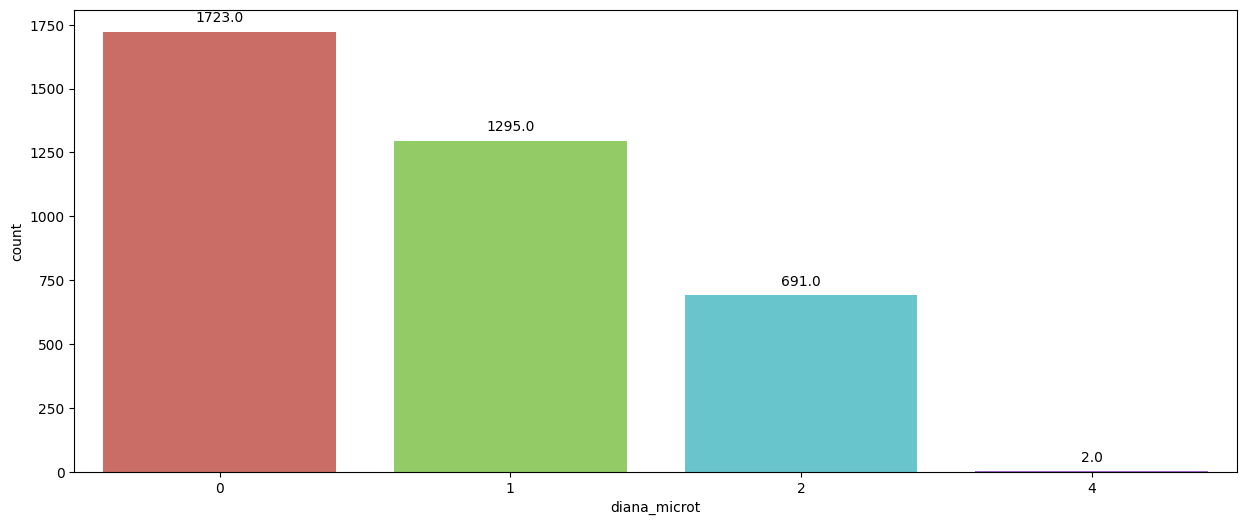

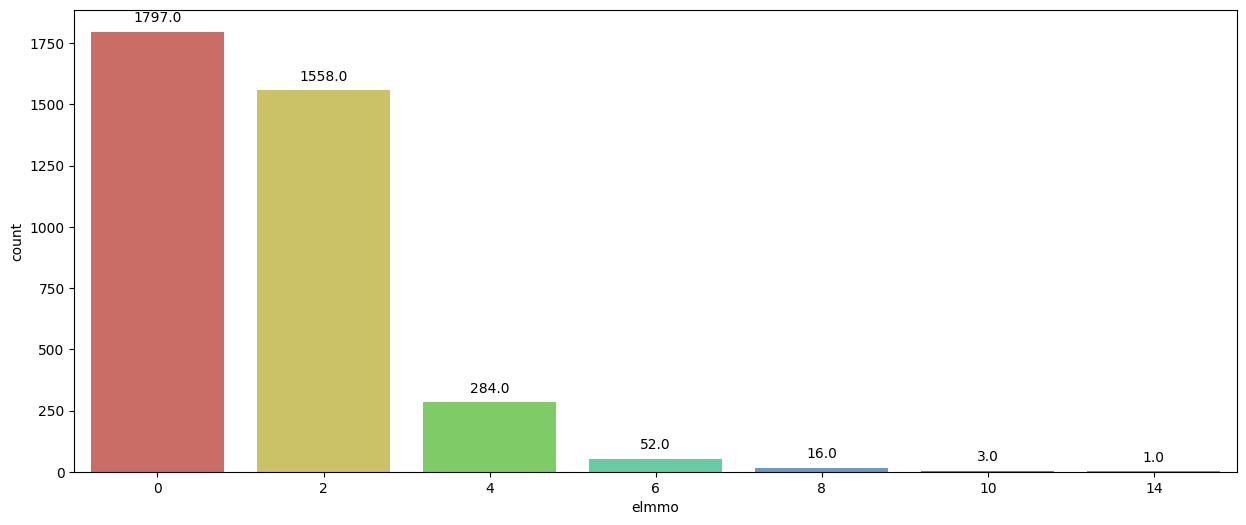

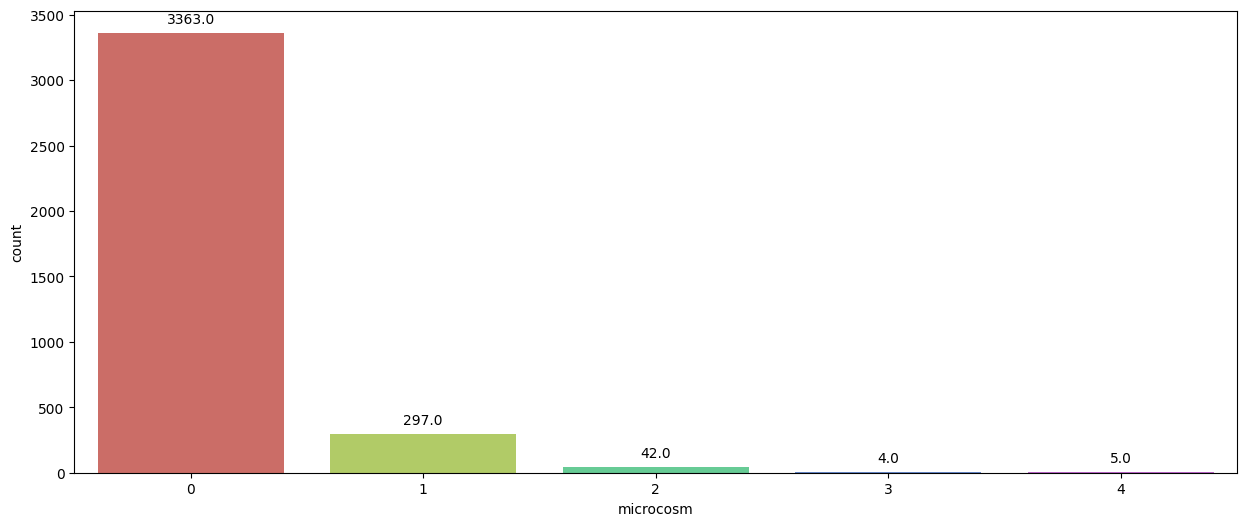

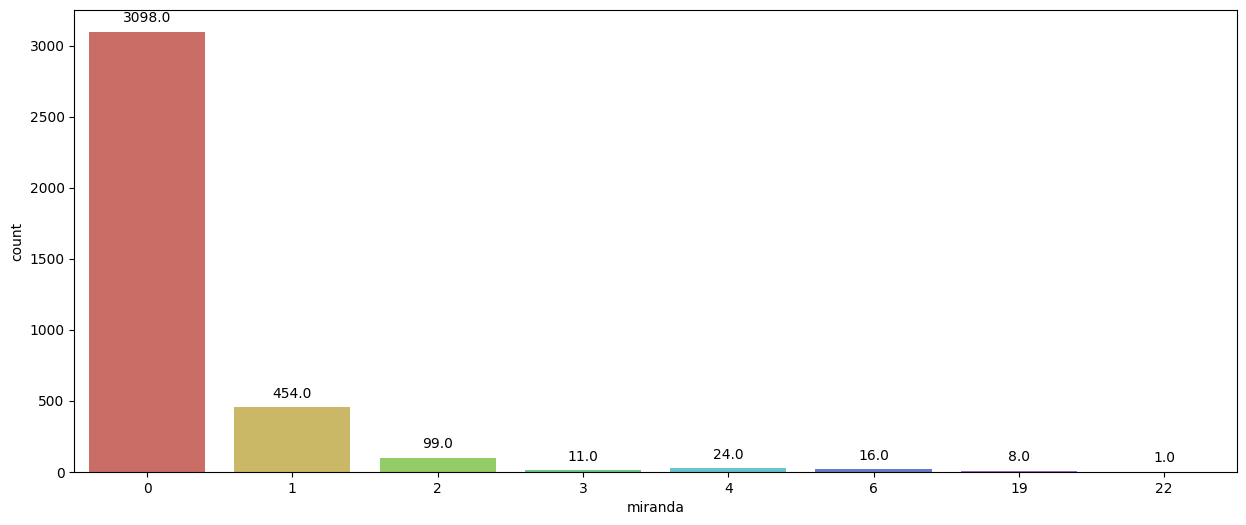

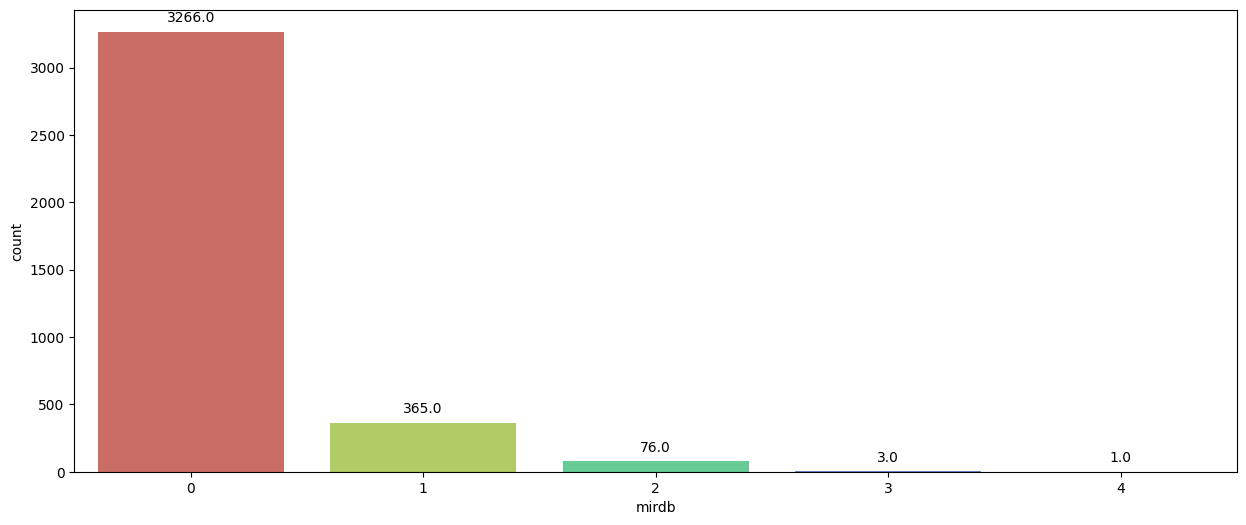

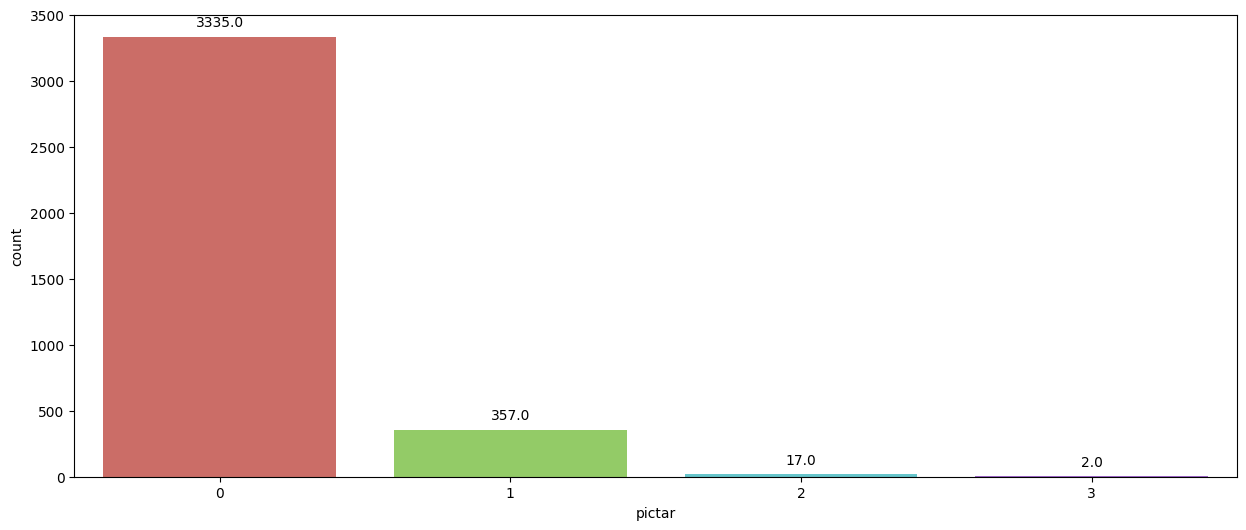

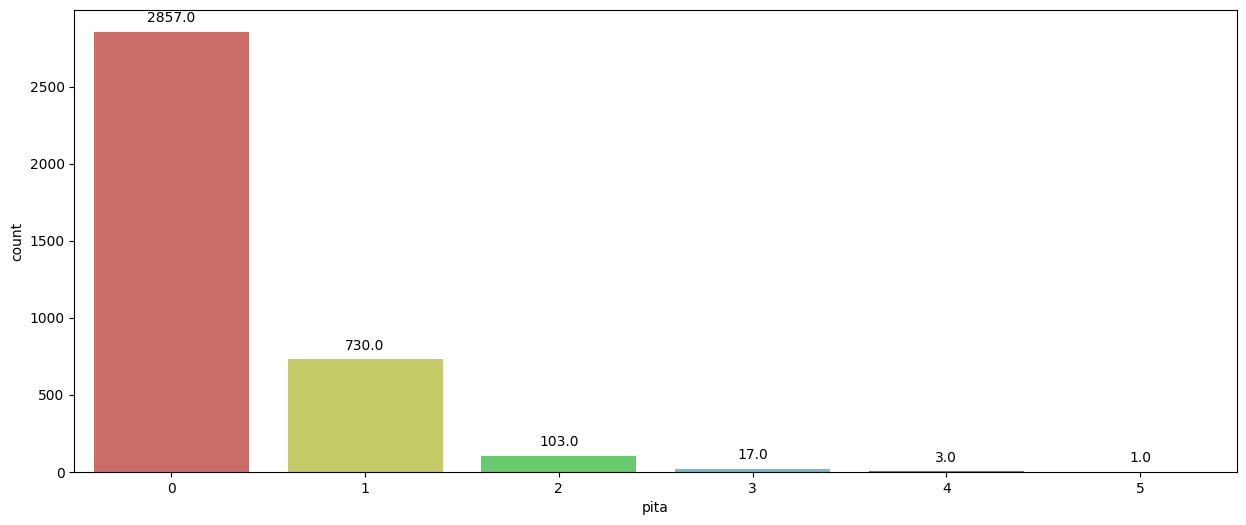

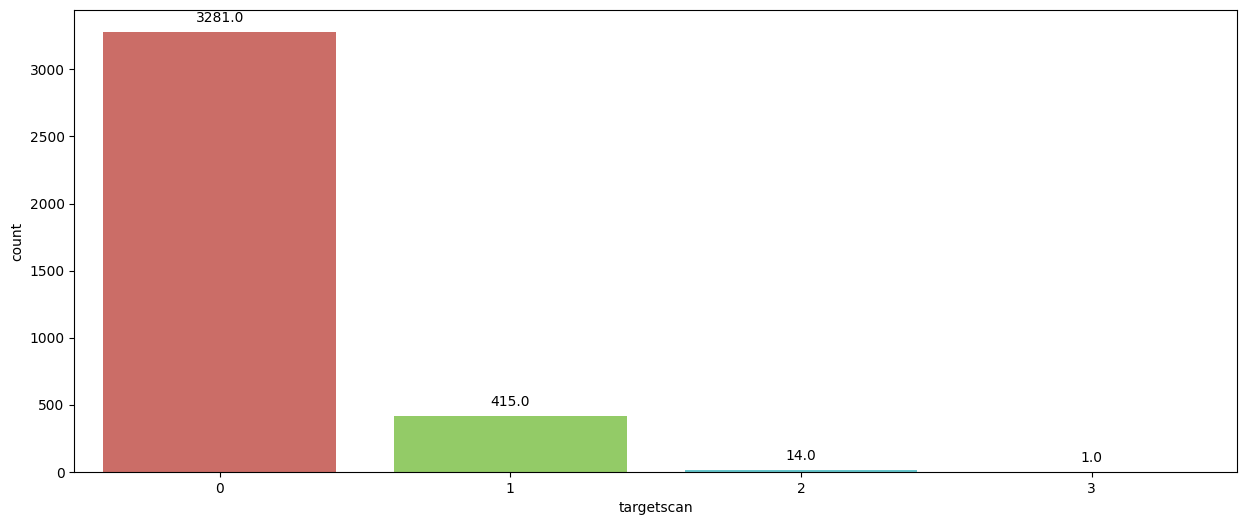

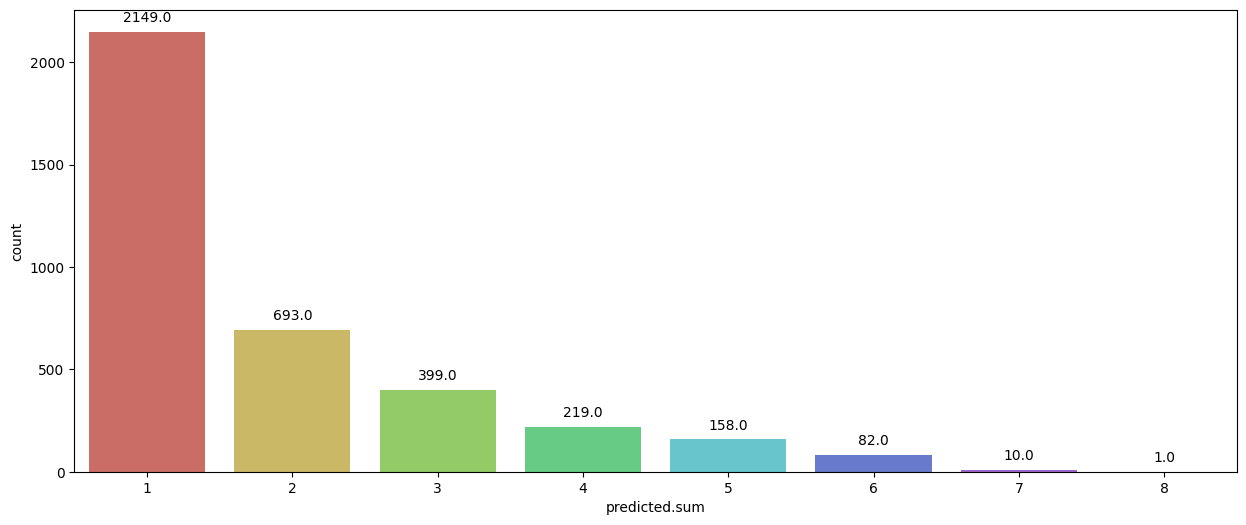

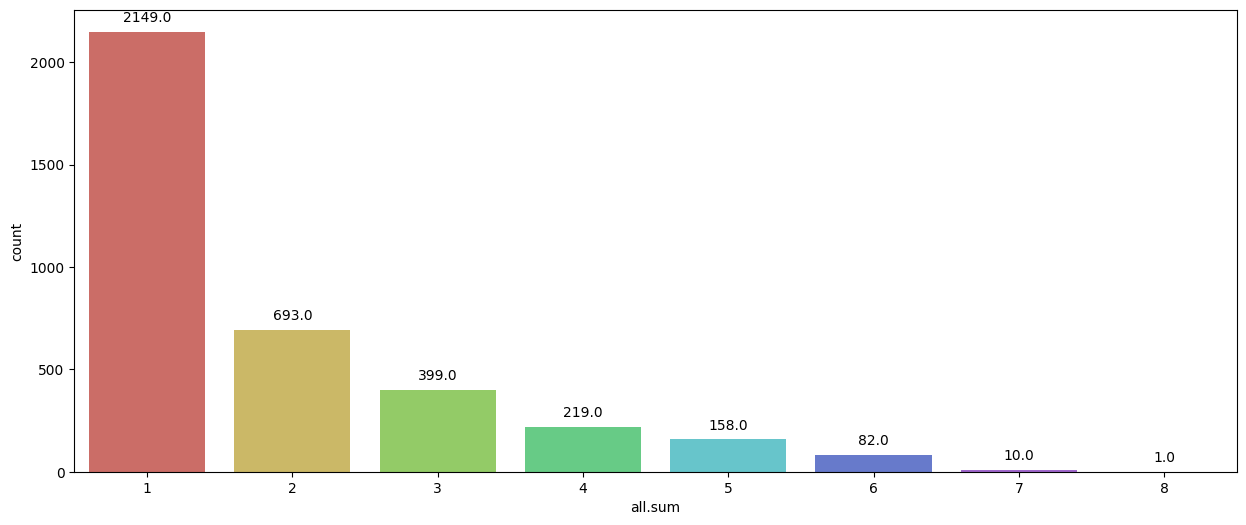

In [21]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}', 
                    xy=(p.get_x() + p.get_width() / 2., height),
                    xytext=(0, 10),  
                    textcoords='offset points',  
                    ha='center', va='center')  
    
    plt.show()

In [22]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts()
    fig = px.pie(counts, values=counts.values, names=counts.index, title=f'Distribution of {i}')
    fig.show()  

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

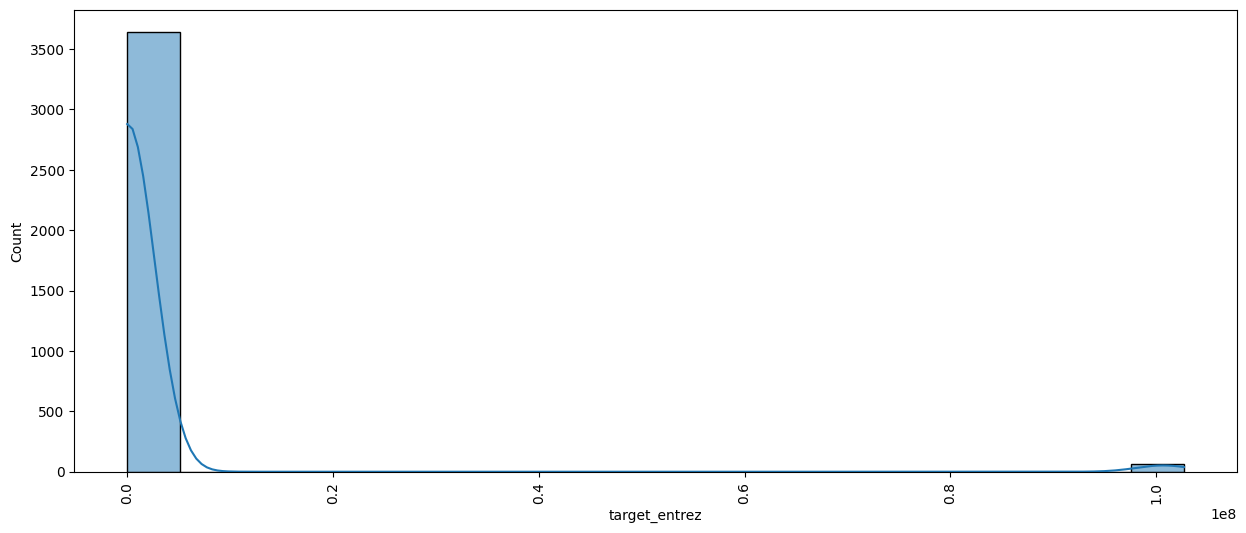

In [23]:
for i in continuous:
    plt.figure(figsize=(15,6))
    sns.histplot(df[i], bins = 20, kde = True, palette='hls')
    plt.xticks(rotation = 90)
    plt.show()

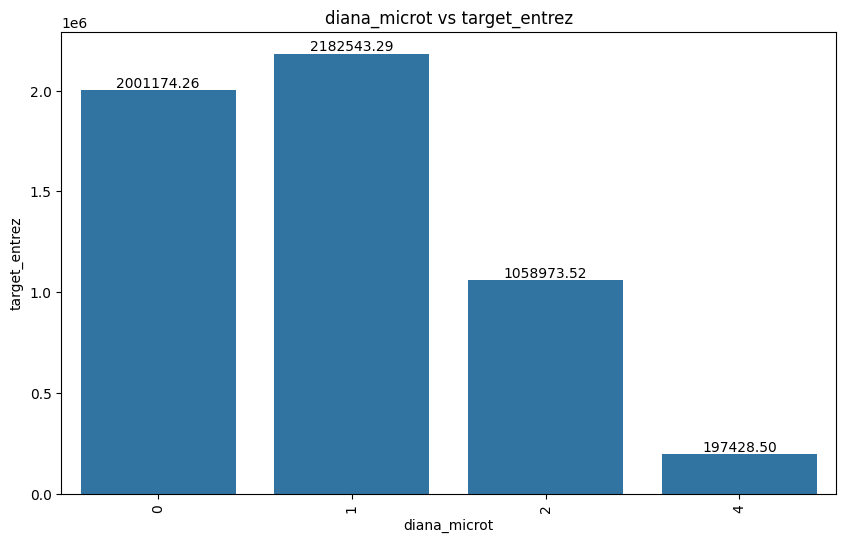

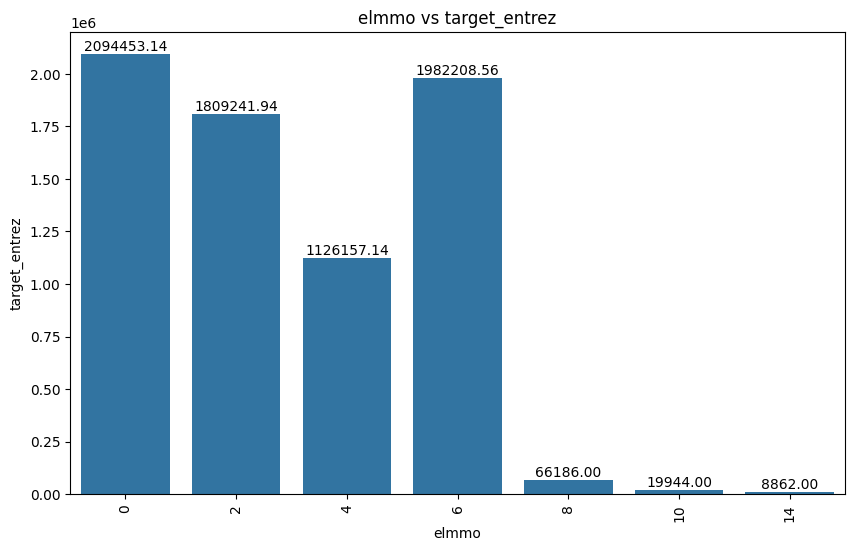

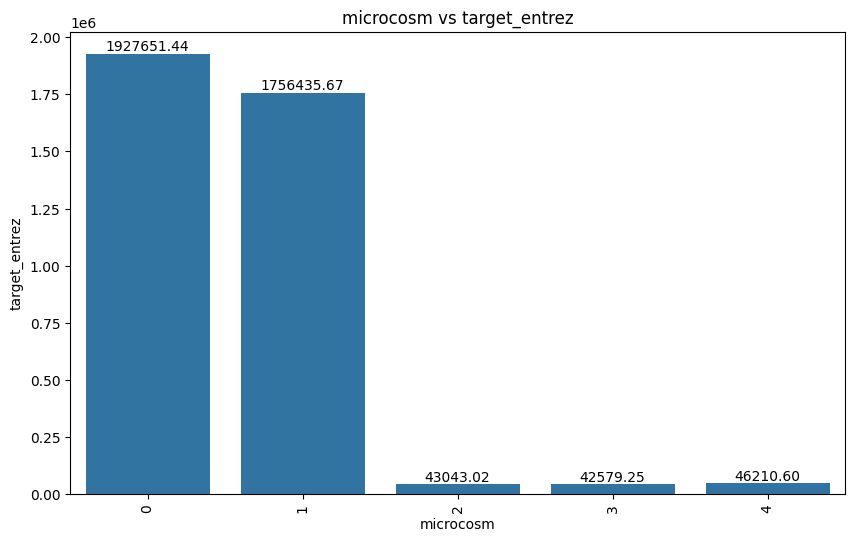

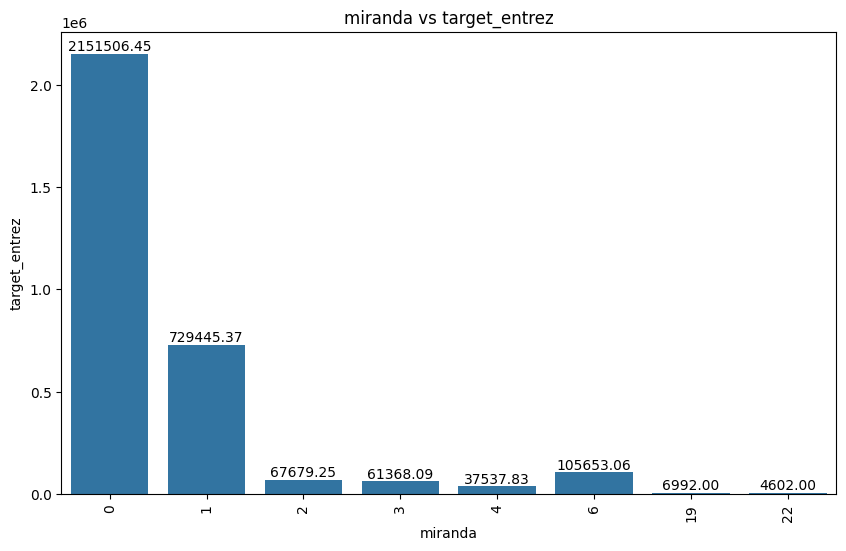

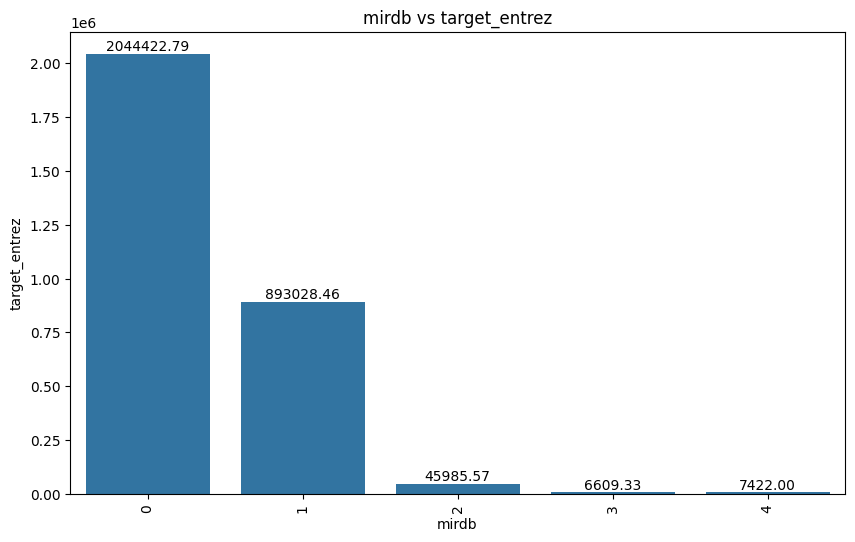

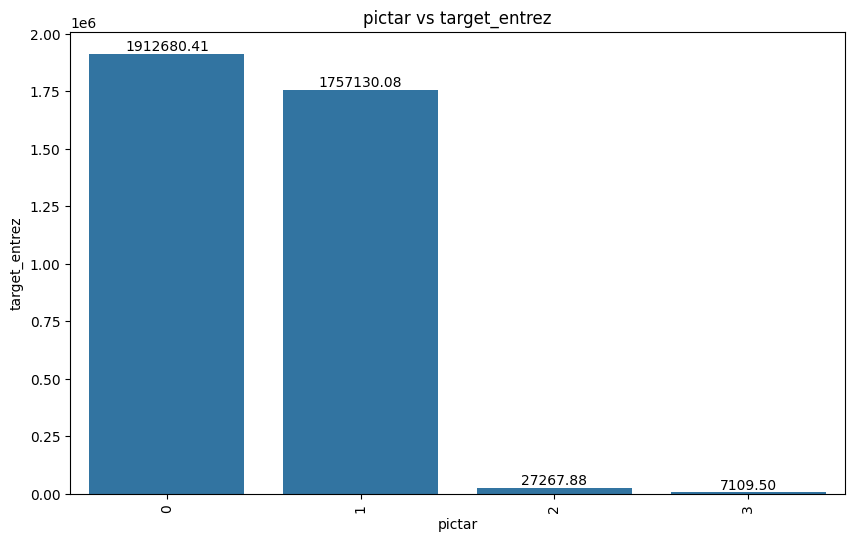

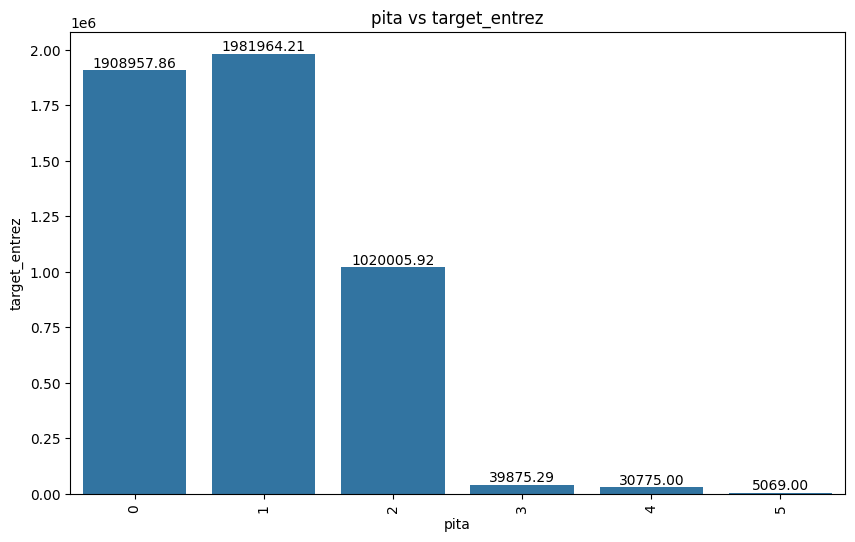

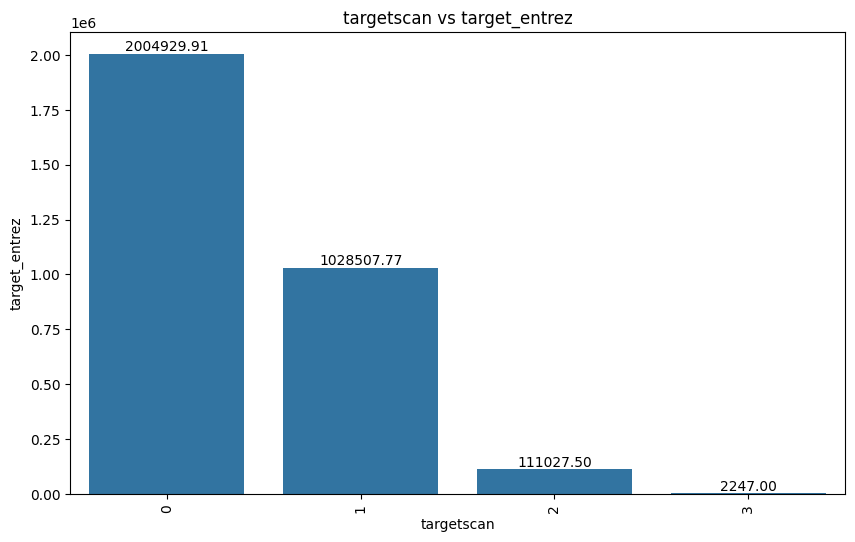

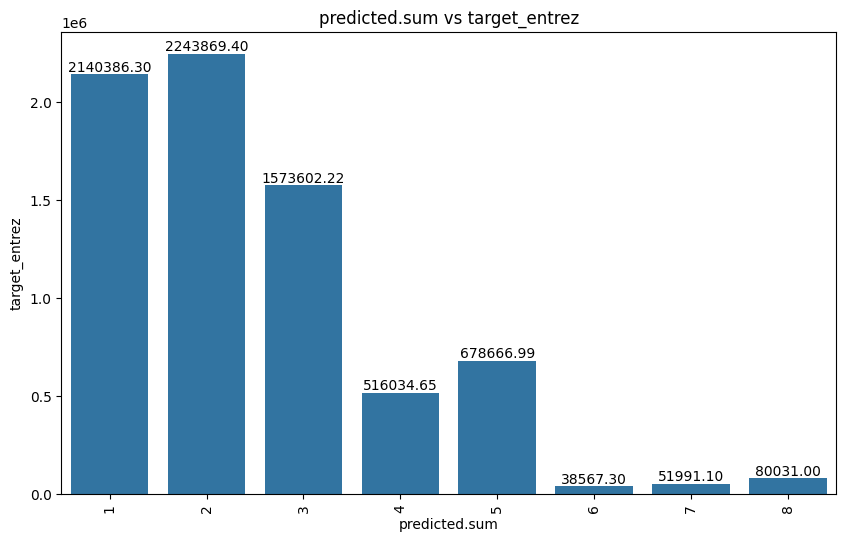

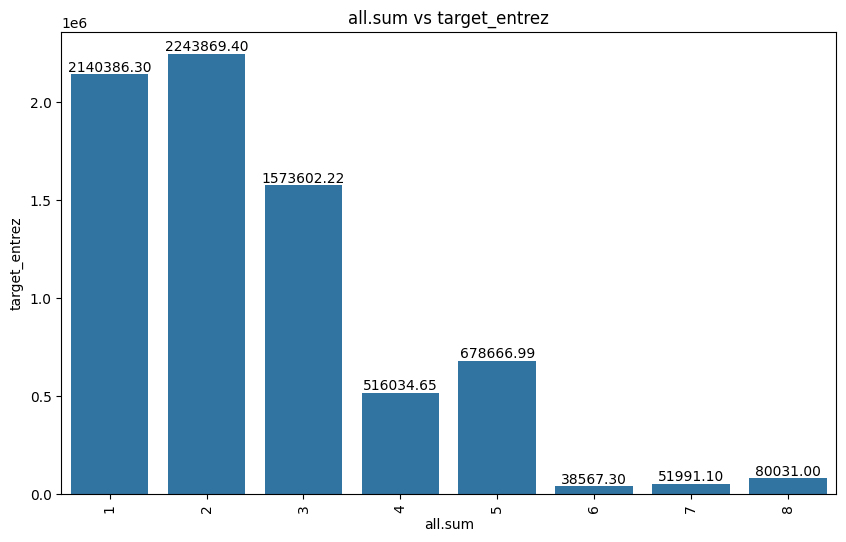

In [24]:
for dis in discrete:
    for cont in continuous:
        plt.figure(figsize=(10, 6))
        ax = sns.barplot(data=df, x=dis, y=cont, ci=None)
        plt.title(f'{dis} vs {cont}')
        
        for p in ax.patches:
            height = p.get_height()
            ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=10, color='black', rotation=0)
        plt.xticks(rotation = 90)
        plt.show()

In [25]:
pivot_table = df.pivot_table(
    values=['predicted.sum', 'all.sum'],
    index='target_symbol',
    aggfunc='mean'
)

pivot_table

,all.sum,predicted.sum
target_symbol,,
02-Sep,3.0,3.0
03-Sep,1.0,1.0
04-Mar,1.0,1.0
05-Mar,2.0,2.0
05-Sep,1.0,1.0
...,...,...
ZRANB1,1.0,1.0
ZSCAN31,2.0,2.0
ZSWIM3,3.0,3.0


In [26]:
pivot_table_mean_interactions = df.pivot_table(
    values=['diana_microt', 'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita', 'targetscan'],
    index='target_symbol',
    aggfunc='mean'
)

pivot_table_mean_interactions

,diana_microt,elmmo,microcosm,miranda,mirdb,pictar,pita,targetscan
target_symbol,,,,,,,,
02-Sep,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
03-Sep,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
04-Mar,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
05-Mar,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
05-Sep,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
ZRANB1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ZSCAN31,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
ZSWIM3,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0


In [27]:
pivot_table_count = df.pivot_table(
    values='mature_mirna_id',
    index='target_symbol',
    aggfunc='count'
)

pivot_table_count

,mature_mirna_id
target_symbol,
02-Sep,1
03-Sep,1
04-Mar,1
05-Mar,1
05-Sep,2
...,...
ZRANB1,1
ZSCAN31,1
ZSWIM3,1


In [28]:
df = df.drop(['mature_mirna_acc', 'mature_mirna_id'], axis=1)

In [29]:
df.columns

Index(['target_symbol', 'target_entrez', 'target_ensembl', 'diana_microt',
       'elmmo', 'microcosm', 'miranda', 'mirdb', 'pictar', 'pita',
       'targetscan', 'predicted.sum', 'all.sum'],
      dtype='object')

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [31]:
label_encoder = LabelEncoder()
df['target_symbol'] = label_encoder.fit_transform(df['target_symbol'])
df['target_ensembl'] = label_encoder.fit_transform(df['target_ensembl'])

X_regression = df.drop(['all.sum'], axis=1)
y_regression = df['all.sum']

print(X_regression.dtypes)

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, test_size=0.2, random_state=42)

scaler = StandardScaler()

num_cols_reg = X_train_reg.select_dtypes(include=['float64', 'int64']).columns

X_train_reg[num_cols_reg] = scaler.fit_transform(X_train_reg[num_cols_reg])
X_test_reg[num_cols_reg] = scaler.transform(X_test_reg[num_cols_reg])

target_symbol       int32
target_entrez     float64
target_ensembl      int32
diana_microt        int64
elmmo               int64
microcosm           int64
miranda             int64
mirdb               int64
pictar              int64
pita                int64
targetscan          int64
predicted.sum       int64
dtype: object


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [33]:
y_pred_reg = reg.predict(X_test_reg)
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_reg))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_reg))
print("R^2 Score:", r2_score(y_test_reg, y_pred_reg))

Mean Absolute Error: 0.0013593539703903093
Mean Squared Error: 0.001372947510094212
R^2 Score: 0.9992747817458799


In [36]:
from sklearn.tree import DecisionTreeRegressor

dtr_reg = DecisionTreeRegressor(random_state=42)
dtr_reg.fit(X_train_reg, y_train_reg)

DecisionTreeRegressor(random_state=42)

In [37]:
y_pred_dtr = dtr_reg.predict(X_test_reg)
print("\nDecision Tree Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_dtr))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_dtr))
print("R^2 Score:", r2_score(y_test_reg, y_pred_dtr))


Decision Tree Regressor:
Mean Absolute Error: 0.0013458950201884253
Mean Squared Error: 0.0013458950201884253
R^2 Score: 0.9992890714105283


In [38]:
import xgboost as xgb

xgr_reg = xgb.XGBRegressor(random_state=42)
xgr_reg.fit(X_train_reg, y_train_reg)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [39]:
y_pred_xgr = xgr_reg.predict(X_test_reg)
print("\nXGBoost Regressor:")
print("Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_xgr))
print("Mean Squared Error:", mean_squared_error(y_test_reg, y_pred_xgr))
print("R^2 Score:", r2_score(y_test_reg, y_pred_xgr))


XGBoost Regressor:
Mean Absolute Error: 0.001363347228090022
Mean Squared Error: 0.0013466810380633229
R^2 Score: 0.999288656220212
